In [52]:
#Import necessary libraries
import seaborn as sns
import statsmodels.api as sm
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

# ***1.Read the dataset***

In [53]:
ml=pd.read_excel("Concrete_Data.xls")

In [54]:
ml.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [55]:
ml['Cement'] = ml['Cement (component 1)(kg in a m^3 mixture)']
ml['Blastfurnace']=ml['Blast Furnace Slag (component 2)(kg in a m^3 mixture)']
ml['Flyash']=ml['Fly Ash (component 3)(kg in a m^3 mixture)']
ml['Water']=ml['Water  (component 4)(kg in a m^3 mixture)']
ml['Superplasticizer']=ml['Superplasticizer (component 5)(kg in a m^3 mixture)']
ml['Coarse Aggregate']=ml['Coarse Aggregate  (component 6)(kg in a m^3 mixture)']
ml['Fine Aggregate']=ml['Fine Aggregate (component 7)(kg in a m^3 mixture)']
ml['Age']=ml['Age (day)']
ml['Concrete compressive strength']=ml['Concrete compressive strength(MPa, megapascals) ']

In [56]:
ml.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",Cement,Blastfurnace,Flyash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [57]:
ml.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) ', 'Cement',
       'Blastfurnace', 'Flyash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [58]:
col={'Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '}
ml=ml.drop(columns=col)


In [59]:
ml.head()

,Cement,Blastfurnace,Flyash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


***2.Print the shape of the data***

In [60]:
ml.shape

(1030, 9)

***3,4.List out the feature variables and their data-types***

In [61]:
ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blastfurnace                   1030 non-null   float64
 2   Flyash                         1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


### Observations:

* All the features except Age are of float data type  
* Age is of int data type  
* Concrete compressive strength(Response Variable) is of float data type

***5.Check for null values in the feature variables***

In [62]:
ml.isnull().sum()

Cement                           0
Blastfurnace                     0
Flyash                           0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [63]:
ml_summary=ml.describe()
ml_summary

,Cement,Blastfurnace,Flyash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [64]:
for col in ml.columns:
    print('column name:',col)
    print(ml[col].value_counts())

column name: Cement
362.60    20
425.00    20
251.37    15
310.00    14
446.00    14
          ..
151.60     1
164.20     1
297.80     1
149.50     1
485.00     1
Name: Cement, Length: 280, dtype: int64
column name: Blastfurnace
0.0      466
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
184.0      1
100.6      1
196.0      1
169.6      1
50.0       1
Name: Blastfurnace, Length: 187, dtype: int64
column name: Flyash
0.00      566
141.00     16
118.27     15
79.00      14
94.00      13
         ... 
103.30      1
137.90      1
106.70      1
130.00      1
165.70      1
Name: Flyash, Length: 163, dtype: int64
column name: Water
192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
190.6      1
171.6      1
186.4      1
173.8      1
166.7      1
Name: Water, Length: 205, dtype: int64
column name: Superplasticizer
0.0     379
8.0      27
11.6     21
7.0      19
6.0      17
       ... 
20.8      1
6.6       1
11.5      1
10.6      1
15.3      1
Name:

### Observations:

* All the features doesn't have any NaN values.
* But Superplasticizer, Fly_Ash, Blast_Furnace_Slag features have 0 values recorded. So below we are replacing all those 0s with mean value.

In [65]:
ml['Blastfurnace']=ml['Blastfurnace'].apply(lambda x: ml['Blastfurnace'].mean() if x==0 else x )

In [66]:
ml['Blastfurnace'].value_counts()

73.895485     466
189.000000     30
106.300000     20
24.000000      14
20.000000      12
             ... 
174.000000      1
128.900000      1
237.000000      1
119.000000      1
243.000000      1
Name: Blastfurnace, Length: 187, dtype: int64

In [67]:
ml['Flyash']=ml['Flyash'].apply(lambda x: ml['Flyash'].mean() if x==0 else x )

In [68]:
ml['Flyash'].value_counts()

54.187136     566
141.000000     16
118.270000     15
79.000000      14
94.000000      13
             ... 
166.000000      1
137.000000      1
106.000000      1
112.600000      1
165.700000      1
Name: Flyash, Length: 163, dtype: int64

In [69]:
ml['Superplasticizer']=ml['Superplasticizer'].apply(lambda x: ml['Superplasticizer'].mean() if x==0 else x )

In [70]:
ml['Superplasticizer'].value_counts()

6.203112     379
8.000000      27
11.600000     21
7.000000      19
6.000000      17
            ... 
8.260000       1
5.850000       1
7.400000       1
9.030000       1
6.500000       1
Name: Superplasticizer, Length: 155, dtype: int64

In [18]:
#ml['Age']=ml['Age'].apply(lambda x: ml['Age'].mean() if x==0 else x )

In [19]:
#ml['Age'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age'>

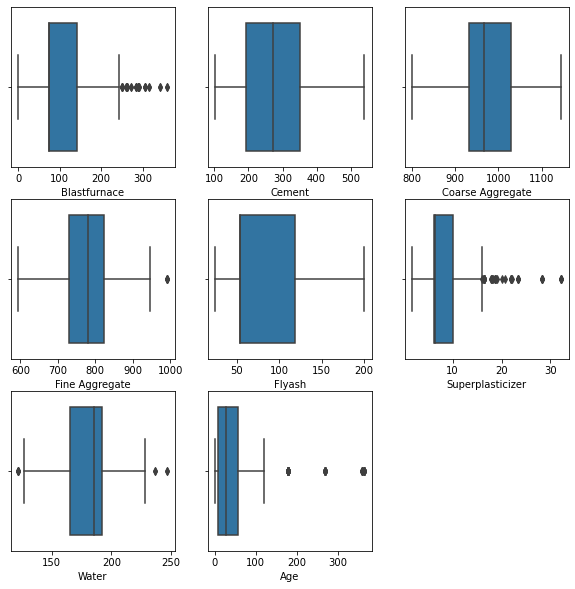

In [72]:
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
sns.boxplot(ml['Blastfurnace'])
plt.subplot(3,3,2)
sns.boxplot(ml['Cement'])
plt.subplot(3,3,3)
sns.boxplot(ml['Coarse Aggregate'])
plt.subplot(3,3,4)
sns.boxplot(ml['Fine Aggregate'])
plt.subplot(3,3,5)
sns.boxplot(ml['Flyash'])
plt.subplot(3,3,6)
sns.boxplot(ml['Superplasticizer'])
plt.subplot(3,3,7)
sns.boxplot(ml['Water'])
plt.subplot(3,3,8)
sns.boxplot(ml['Age'])
#plt.subplot(3,3,9)
#sns.boxplot(ml['Concrete compressive strength'])

There are few outliers in the above boxplots in Blastfurnace, Water, Superplasticizer, Fine Aggregate and Age.

**6.Check for outliers**

In [75]:
def outliers(array):
    Q1 = array.quantile(q=0.25)
    Q2 = array.quantile(q=0.5)
    Q3 = array.quantile(q=0.75)

    print('Q1=',Q1,',Q2=',Q2,',Q3=',Q3)

    IQR = Q3-Q1
    print('IQR=',IQR)
    UB = Q3 + 1.5*IQR
    LB  = Q1 - 1.5*IQR

    print("UB= ",UB,"LB= ",LB)
    print("Outliers = ",array[(array<LB)|(array>UB)].count())
    print("mean=",array.mean(),"median=",array.median(),"std=",array.std())

In [76]:
outliers(ml["Cement"])

Q1= 192.375 ,Q2= 272.9 ,Q3= 350.0
IQR= 157.625
UB=  586.4375 LB=  -44.0625
Outliers =  0
mean= 281.165631067961 median= 272.9 std= 104.50714164287166


In [77]:
outliers(ml["Blastfurnace"])

Q1= 73.89548543689324 ,Q2= 73.89548543689324 ,Q3= 142.95
IQR= 69.05451456310675
UB=  246.5317718446601 LB=  -29.686286407766886
Outliers =  35
mean= 107.32781185785655 median= 73.89548543689324 std= 62.06752929381678


In [78]:
outliers(ml["Flyash"])

Q1= 54.18713592233009 ,Q2= 54.18713592233009 ,Q3= 118.27
IQR= 64.08286407766991
UB=  214.39429611650485 LB=  -41.93716019417477
Outliers =  0
mean= 83.96375624469772 median= 54.18713592233009 std= 39.91192186666757


In [79]:
outliers(ml["Water"])

Q1= 164.9 ,Q2= 185.0 ,Q3= 192.0
IQR= 27.099999999999994
UB=  232.64999999999998 LB=  124.25000000000001
Outliers =  9
mean= 181.56635922330082 median= 185.0 std= 21.35556706691148


In [80]:
outliers(ml["Superplasticizer"])

Q1= 6.203111650485436 ,Q2= 6.35 ,Q3= 10.16
IQR= 3.956888349514564
UB=  16.095332524271846 LB=  0.2677791262135898
Outliers =  52
mean= 8.485615840324376 median= 6.35 std= 4.03674698147042


In [81]:
outliers(ml["Coarse Aggregate"])

Q1= 932.0 ,Q2= 968.0 ,Q3= 1029.4
IQR= 97.40000000000009
UB=  1175.5000000000002 LB=  785.8999999999999
Outliers =  0
mean= 972.9185922330093 median= 968.0 std= 77.75381809178938


In [82]:
outliers(ml["Fine Aggregate"])

Q1= 730.95 ,Q2= 779.51 ,Q3= 824.0
IQR= 93.04999999999995
UB=  963.5749999999999 LB=  591.3750000000001
Outliers =  5
mean= 773.5788834951443 median= 779.51 std= 80.17542739902382


In [83]:
outliers(ml["Age"])

Q1= 7.0 ,Q2= 28.0 ,Q3= 56.0
IQR= 49.0
UB=  129.5 LB=  -66.5
Outliers =  59
mean= 45.662135922330094 median= 28.0 std= 63.169911581033155


**7. Treat outliers. What is your strategy? What other strategies can be used?**  
we can remove the outliers using winsorize method
we can transform the outliers by transforming the feature distribution into normal using boxcox or log functions

In [84]:
from scipy.stats.mstats import winsorize
winsorize(ml['Age'],(0,0.1),inplace=True)

masked_array(data=[ 28,  28, 100, ...,  28,  28,  28],
             mask=False,
       fill_value=999999)

In [85]:
winsorize(ml['Blastfurnace'],(0,0.1),inplace=True)

masked_array(data=[ 73.89548544,  73.89548544, 142.5       , ...,
                   139.4       , 186.7       , 100.5       ],
             mask=False,
       fill_value=1e+20)

In [86]:
winsorize(ml['Water'],(0.1,0.1),inplace=True)

masked_array(data=[162. , 162. , 203.5, ..., 192.7, 175.6, 200.6],
             mask=False,
       fill_value=1e+20)

In [87]:
winsorize(ml['Superplasticizer'],(0,0.1),inplace=True)

masked_array(data=[ 2.5       ,  2.5       ,  6.20311165, ...,
                    6.1       , 11.3       ,  8.6       ],
             mask=False,
       fill_value=1e+20)

In [88]:
winsorize(ml['Fine Aggregate'],(0,0.1),inplace=True)

masked_array(data=[676. , 676. , 594. , ..., 780. , 788.9, 761.5],
             mask=False,
       fill_value=1e+20)

In [89]:
col1=ml.columns[:8]

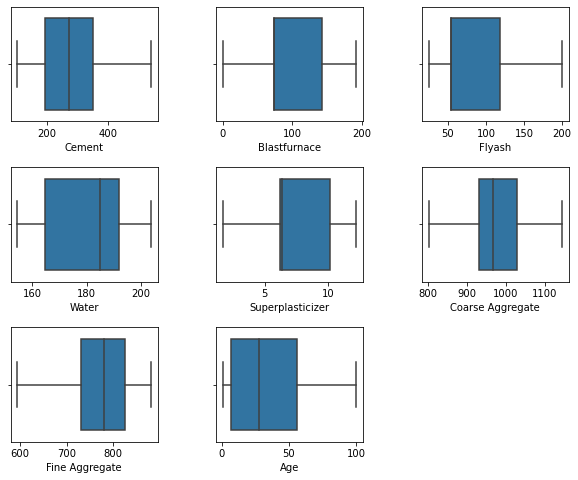

In [90]:
plt.figure(figsize =(10,8))
n = 0
for i in col1:
    n += 1
    plt.subplot(3,3,n)
    sns.boxplot(x =ml[i])
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
plt.show()

# 8.Univariate analysis

* Perform univariate analysis (be as creative as possible in your analysis) Visualize the shape of the distribution of data. Is every feature variable normally distributed? Why is normal distribution important for data?  
* Is the data distribution skewed? If highly skewed, do you still find outliers which you did not treat?  
* Draw box and whiskers plot of each of the feature variables  
* How do the distributions look in terms of variation? Which features are widely spread and which are kind of concentrated towards the mean?

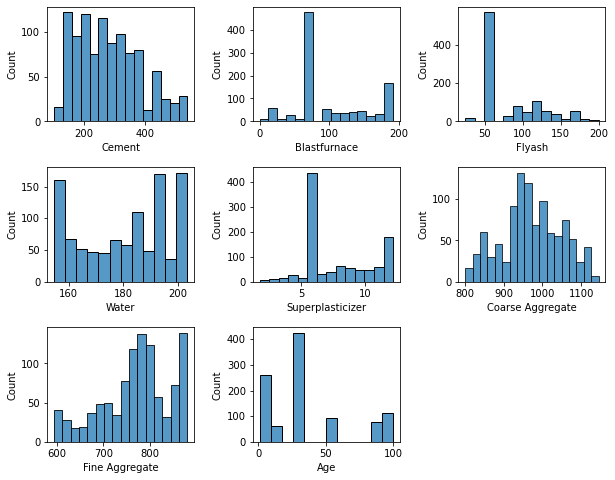

In [91]:
plt.figure(figsize =(10,8))
n = 0
for i in col1:
    n += 1
    plt.subplot(3,3,n)
    sns.histplot(x =ml[i])
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
plt.show()

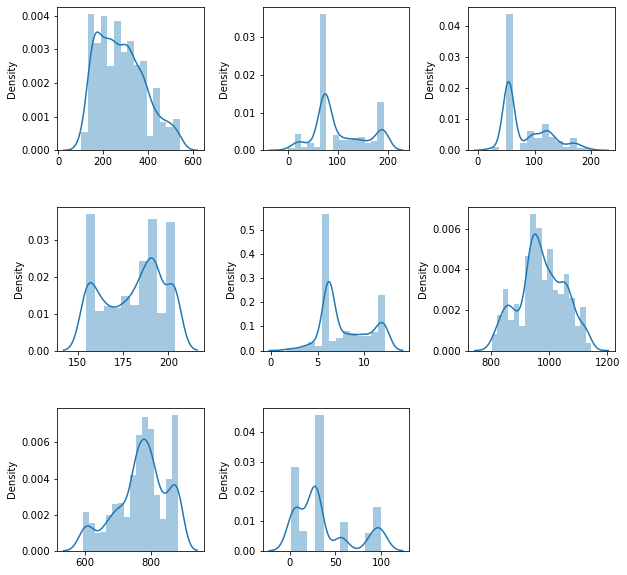

In [92]:
plt.figure(figsize =(10,10))
n = 0
for i in col1:
    n += 1
    plt.subplot(3,3,n)
    sns.distplot(x =ml[i])
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
plt.show()

* All features are normally distributed and skewness is present in some of the features

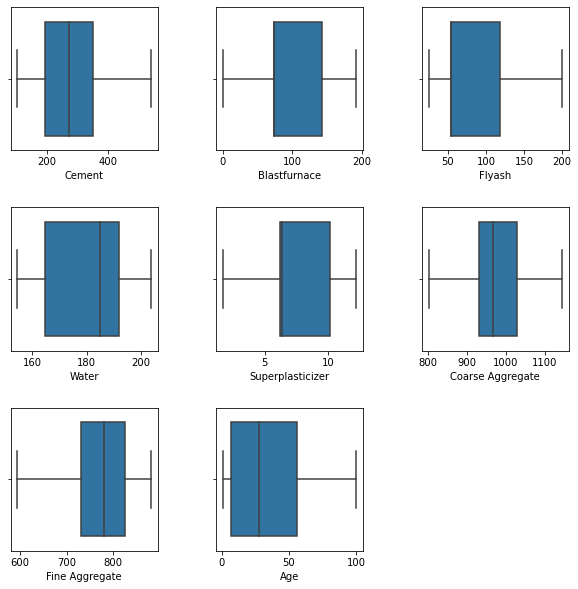

In [93]:
plt.figure(figsize =(10,10))
n = 0
for i in col1:
    n += 1
    plt.subplot(3,3,n)
    sns.boxplot(x =ml[i])
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
plt.show()

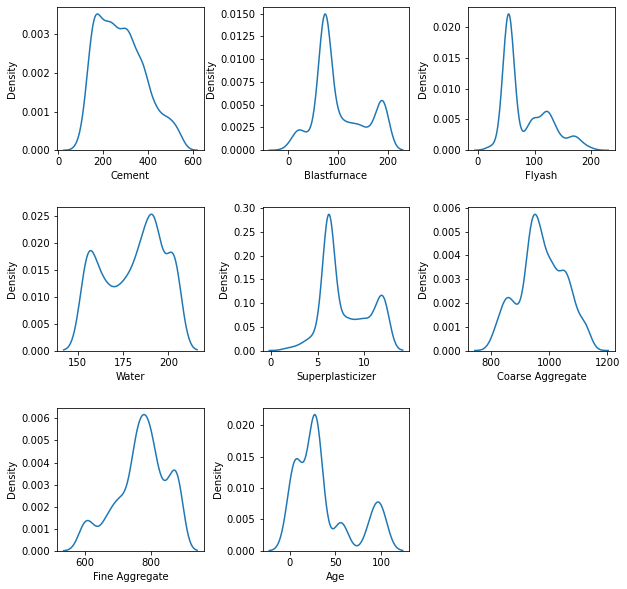

In [94]:
plt.figure(figsize =(10,10))
n = 0
for i in col1:
    n += 1
    plt.subplot(3,3,n)
    sns.kdeplot(x =ml[i])
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
plt.show()

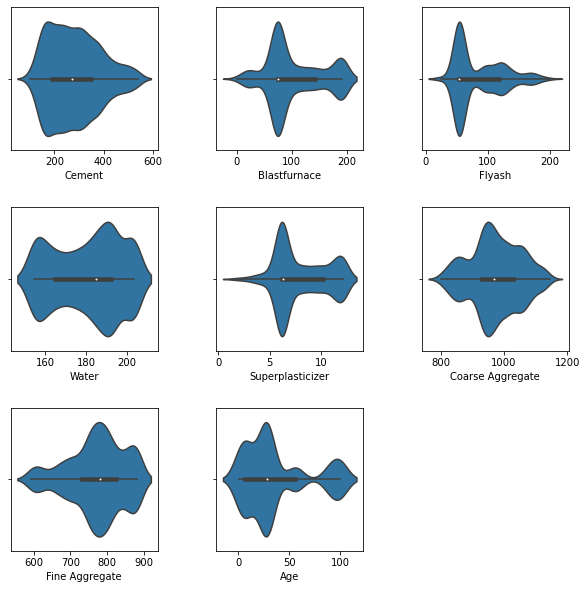

In [95]:
plt.figure(figsize =(10,10))
n = 0
for i in col1:
    n += 1
    plt.subplot(3,3,n)
    sns.violinplot(x =ml[i])
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
plt.show()

# Skewness in data

In [96]:
from scipy.stats import skew
col= ml.columns
skewness_in_data=pd.DataFrame({'Features':col,'skewness':skew(ml[col])})
skewness_in_data

,Features,skewness
0,Cement,0.508775
1,Blastfurnace,0.518709
2,Flyash,0.934447
3,Water,-0.243497
4,Superplasticizer,0.389900
5,Coarse Aggregate,-0.040148
6,Fine Aggregate,-0.527075
7,Age,0.997856
8,Concrete compressive strength,0.416315


### Observations:

* Age is highly right skewed and next comes Flyash.
* Cement and Blastfurnace are right skewed. 
* Superplasticizer is slightly right skewed.
* Water, Fine aggregate and coarse aggregate are slightly left skewed.

# 9. Perform bi-variate analysis


* Try creating correlation matrices. See if there are variables which are strongly or weakly
related  
* If there are variables showing high correlation, what corrective action is needed? Why is
this matter of concern? What if we do not treat the variables showing high degree of
correlation?


<AxesSubplot:>

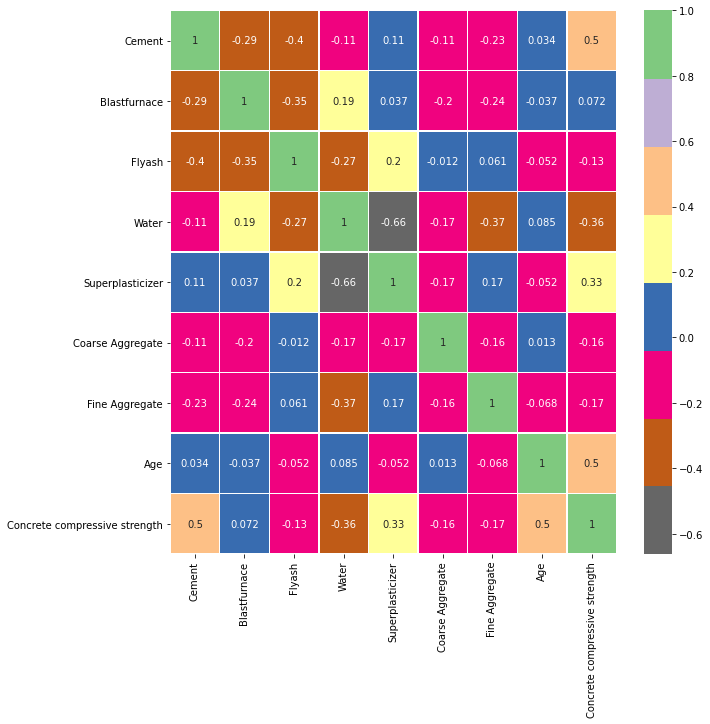

In [97]:
#correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(ml.corr(),annot=True,linewidths=0.5,cmap="Accent_r")

### Observations:

* Here only Cement and Age are slightly positively correlated with the target variable Concrete compressive strength.
* Superplasticizer and water are highly negatively correlated with -0.66 coefficient 
* There is no much multicollinearity in this data.
* If there is any multicollinearity between any two features we can drop one from them.

In [101]:
ml.columns

Index(['Cement', 'Blastfurnace', 'Flyash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

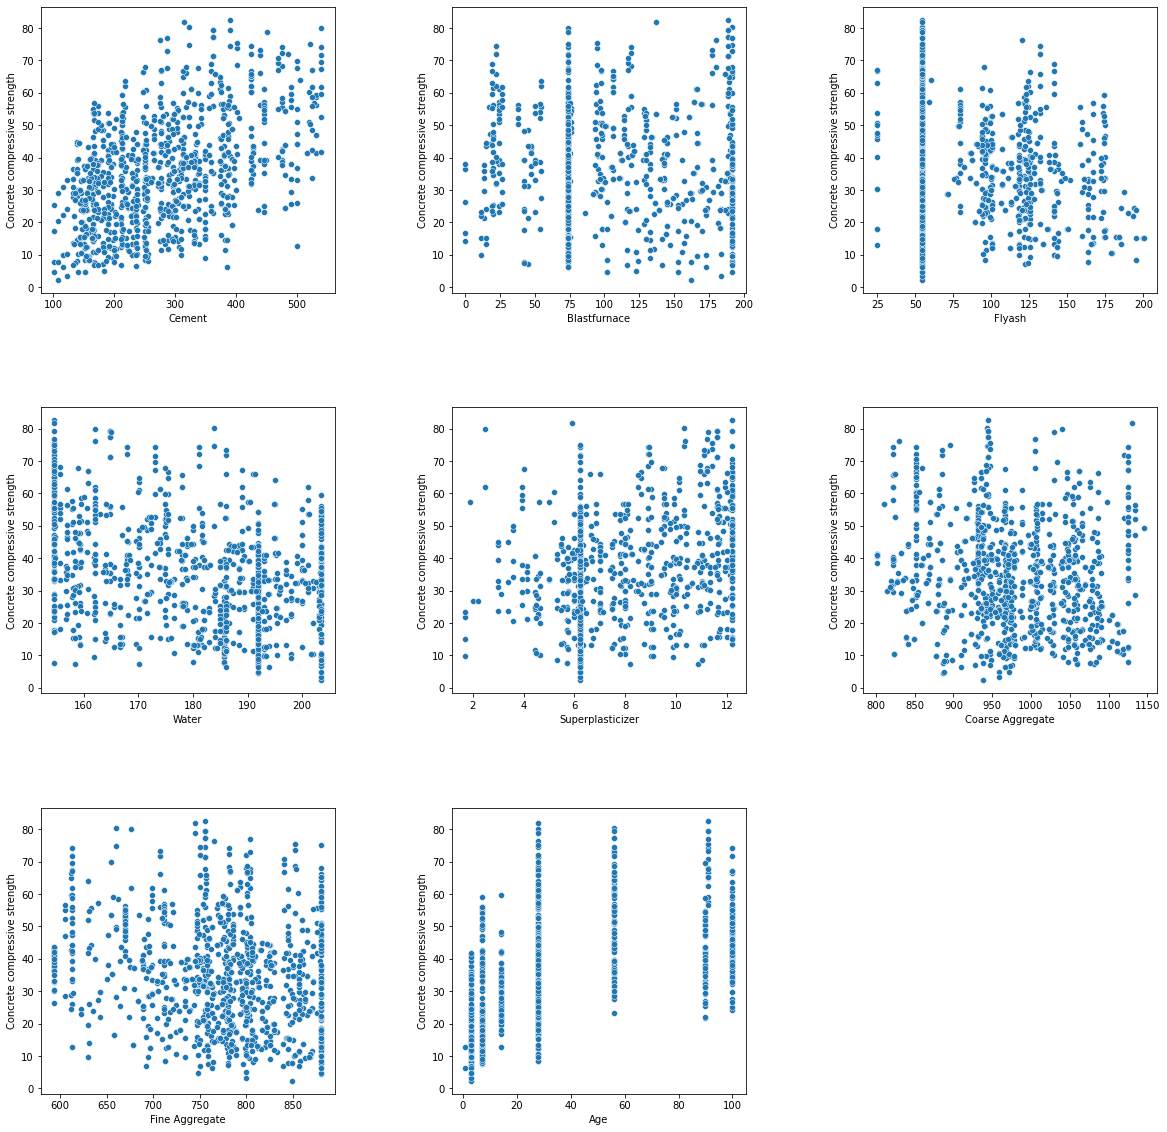

In [102]:
plt.figure(figsize =(20,20))
n = 0
for i in col1[0:8]:
    n += 1
    plt.subplot(3,3,n)
    sns.scatterplot(x =ml[i],y=ml["Concrete compressive strength"])
    plt.subplots_adjust(hspace = 0.4,wspace= 0.4)
plt.show()

* We increase the amount of cement in the concrete then the quality of concrete may also increase.
* The cement data points vary from 100 to 500 and Concrete compressive strength points varies from 0 to 80.
* When the flyash increases, the strength of concrete is decreasing.
* When the age increases from 0 to 80, the stength of concrete is increasing.

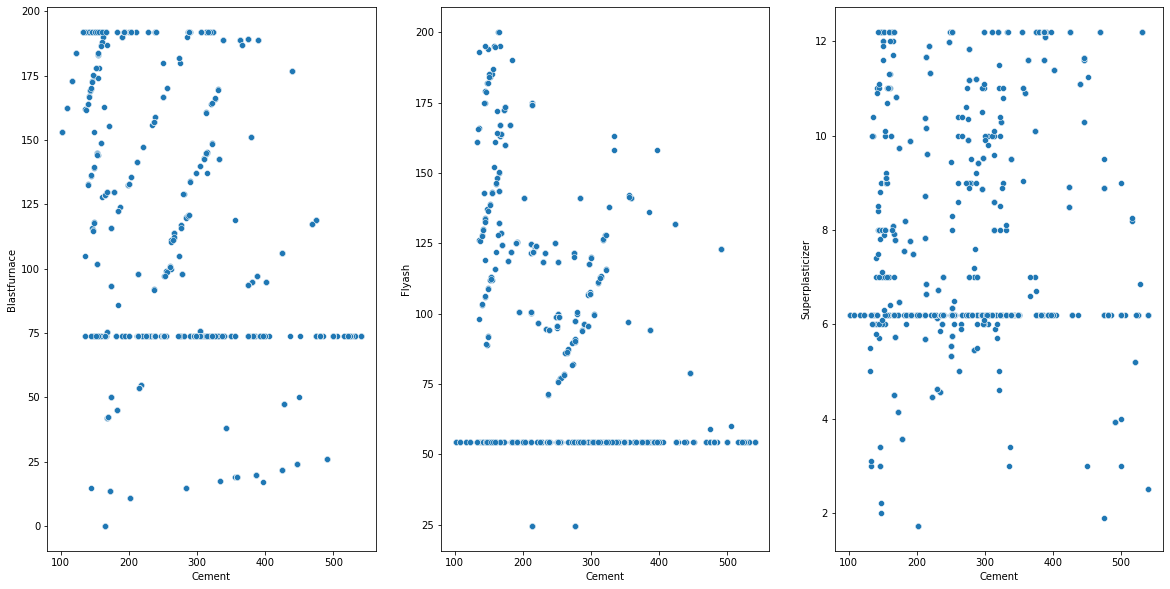

In [103]:
fig, axes = plt.subplots(1, 3, figsize = (20,10));

sns.scatterplot(y="Blastfurnace", x="Cement", data=ml, ax=axes[0]);
sns.scatterplot(y="Flyash", x="Cement", data=ml, ax=axes[1]);
sns.scatterplot(y="Superplasticizer", x="Cement", data=ml, ax=axes[2]);

* As the amount of cement increases, the amount of blustfurnace increasing. A pattern is visible in the first chart.
* If we look at the cement vs flyash closely, we can see pattern with a negative slope,
* The amount of cement is inversely proportional to the amount of flyash.
* The cement vs superplasticizer is similar to that of cement vs Blastfurnance.

<AxesSubplot:xlabel='Cement', ylabel='Water'>

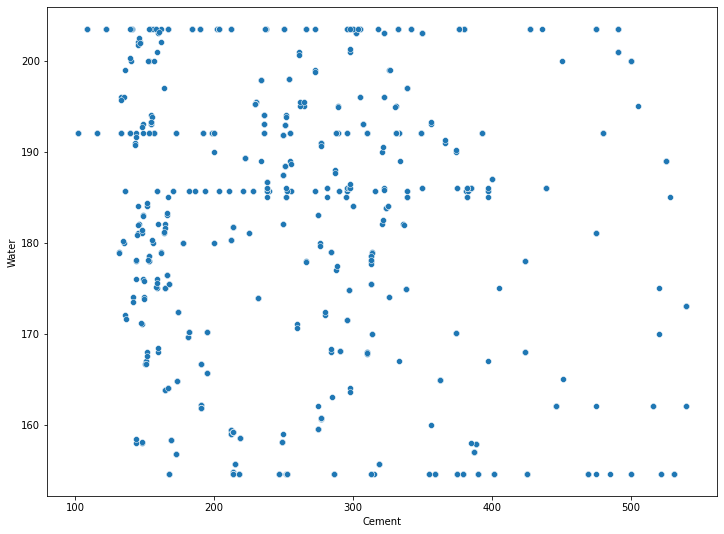

In [104]:
plt.figure(figsize=(12,9))
sns.scatterplot(y="Water",x="Cement",data=ml)

* By above scatter plot if we increase the strength of concrete, it requires more water.

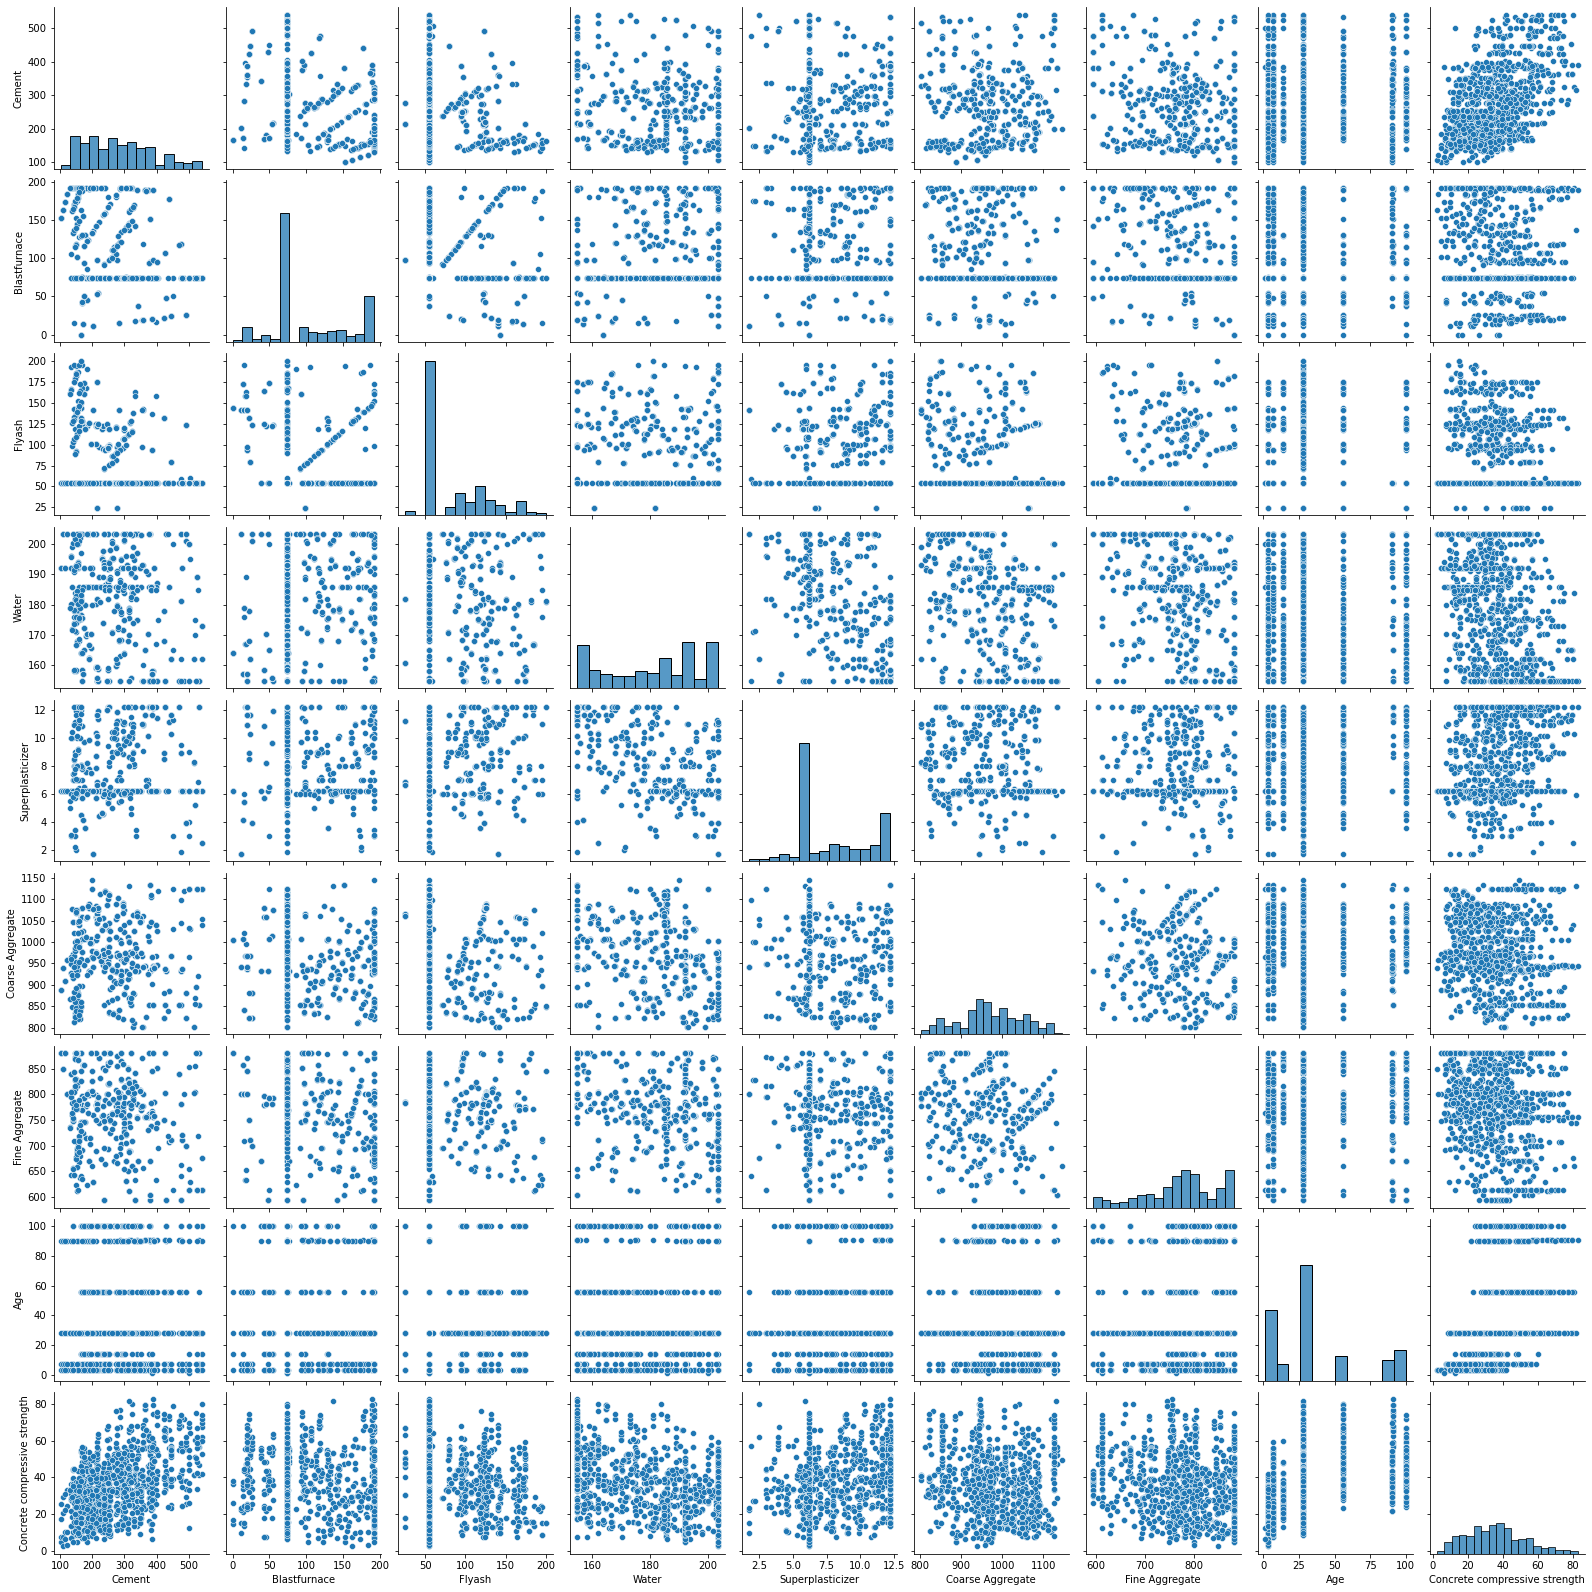

In [105]:
sns.pairplot(ml)

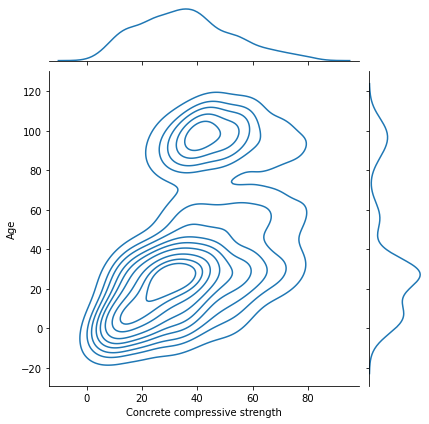

In [111]:
sns.jointplot(x="Concrete compressive strength", y="Age", data=ml[["Age", "Concrete compressive strength"]], kind="kde")

* We can also see that as the age increases, the strength increases

#### 10. What is the type of machine learning problem at hand? (Supervised or Unsupervised?) Why?

* It is a supervised machine learning beacuse it is labelled and target variable is present.

#### 11. What is the category of the machine learning problem at hand? (Classification or Regression?) Why?

* It is a regression because target variable is a continous variable.

Below are the applicable algorithms:
- Linear Regression
- Lasso Regression
- Ridge Regression
- Decision Tree Regressor
- Random Forest Regressor
- KNN Regressor
- SVM Regressor

In [112]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = ml.drop('Concrete compressive strength',axis=1)
y = ml['Concrete compressive strength']
x_sc=sc.fit_transform(x)

# Linear Regression

In [113]:
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [114]:
ml.columns

Index(['Cement', 'Blastfurnace', 'Flyash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age',
       'Concrete compressive strength'],
      dtype='object')

In [115]:
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.3,random_state=0)

In [116]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(721, 8) (309, 8) (721,) (309,)


In [117]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Lasso and ridge regressions

In [118]:
from sklearn.linear_model import Ridge,Lasso
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [119]:
ridge=Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

# Decision Tree Regressor

In [120]:
from sklearn.tree import DecisionTreeRegressor
d_tree=DecisionTreeRegressor()
d_tree.fit(x_train,y_train)

DecisionTreeRegressor()

# KNN Regressor

In [121]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

# Random Forest Regressor

In [122]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(random_state=123)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=123)

# SVM Regressor

In [123]:
from sklearn import svm
svr=svm.SVR()
svr.fit(x_train,y_train)

SVR()

### 13. Pick each of the algorithm and perform the below steps:
* Split your data between train and test steps. 
* Build your model
* List down the evaluation metrics you would use to evaluate the performance of the model?
* Evaluate the model on training data
* Predict the response variables for the test data
* How are the two scores? Are they significantly different? Are they the same? Is the test score better than training score?
* Perform hyper parameter tuning and cross validation techniques.
* Evaluate the model on test data.

# Metrics
* R2 score
* Adjusted R2 score
* Mean Square error
* Root mean square error

In [124]:
x_train.shape[1]

8

In [125]:

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
metrics={}
R_2score=[]
Adjusted_R2=[]
MSE=[]
RMSE=[]
alg=[lr,lasso,ridge,d_tree,knn,rfr,svr]
#n=number of samples
#k=number of predictors
n=len(x_train)
k=x_train.shape[1]
for i in alg:
  pred = i.predict(x_train)
  r2=r2_score(y_train,pred)
  R_2score.append(r2)
  adj_r2=1-((1-r2)*(n-1)/(n-k-1))
  Adjusted_R2.append(adj_r2)
  MSE.append(mean_squared_error(y_train,pred))
  RMSE.append(np.sqrt(mean_squared_error(y_train,pred)))
algos=['LinearRegression','Lasso','Ridge','DecisionTreeRegression','KNN','RandomForestRegression','SVR']
evaluate_metrics_on_train_data=pd.DataFrame({'algorithms':algos,'R_2score':r2,
                                             'Adjusted_R2':Adjusted_R2,'mean_squared':MSE,'root_mean_squared':RMSE})

In [126]:
evaluate_metrics_on_train_data

,algorithms,R_2score,Adjusted_R2,mean_squared,root_mean_squared
0,LinearRegression,0.715134,0.739162,74.358687,8.623148
1,Lasso,0.715134,0.707508,83.382511,9.131402
2,Ridge,0.715134,0.739158,74.359945,8.623221
3,DecisionTreeRegression,0.715134,0.995360,1.322659,1.150069
4,KNN,0.715134,0.863841,38.815786,6.230232
5,RandomForestRegression,0.715134,0.982483,4.993819,2.234685
6,SVR,0.715134,0.711933,82.121102,9.062069


In [127]:
metrics={}
R_2score=[]
Adjusted_R2=[]
MSE=[]
RMSE=[]
algo=[lr,lasso,ridge,d_tree,knn,rfr,svr]
#n=number of samples
#k=number of predictors
n=len(x_train)
k=x_test.shape[1]
for i in alg:
  pred = i.predict(x_test)
  r2=r2_score(y_test,pred)
  R_2score.append(r2)
  adj_r2=(1-(1-r2)*((n-1)/(n-k-1)))
  Adjusted_R2.append(adj_r2)
  MSE.append(mean_squared_error(y_test,pred))
  RMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
algos=['LinearRegression','Lasso','Ridge','DecisionTreeRegression','KNN','RandomForestRegression','SVR']
evaluate_metrics_on_test_data=pd.DataFrame({'algorithm':algos,'R_2score':r2,
                                            'Adjusted_R2':Adjusted_R2,'mean_squared':MSE,'root_mean_squared':RMSE})

In [128]:
evaluate_metrics_on_test_data

,algorithm,R_2score,Adjusted_R2,mean_squared,root_mean_squared
0,LinearRegression,0.69742,0.719343,71.244132,8.440624
1,Lasso,0.69742,0.709882,73.645760,8.581711
2,Ridge,0.69742,0.719654,71.165147,8.435944
3,DecisionTreeRegression,0.69742,0.792918,52.567218,7.250325
4,KNN,0.69742,0.742723,65.309298,8.081417
5,RandomForestRegression,0.69742,0.886915,28.706389,5.357834
6,SVR,0.69742,0.694020,77.672248,8.813186


### **Performing hyper parameter tuning and cross validation techniques.**

In [129]:
from sklearn.model_selection import GridSearchCV

In [130]:
#Lasso Regression
params = {'alpha':[i for i in np.arange(0.1,10,0.1)]}
alg1 =Lasso()
alg1_lasso= GridSearchCV(estimator=alg1,param_grid=params,verbose=1,return_train_score=True)
alg1_lasso.fit(x_train,y_train)
alg1_lasso.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


{'alpha': 0.1}

In [131]:
#Ridge regression
params = {'alpha':[i for i in np.arange(0.1,10,0.1)]}
alg2 = Ridge()
alg2_ridge= GridSearchCV(estimator=alg2,param_grid=params,verbose=1,return_train_score=True)
alg2_ridge.fit(x_train,y_train)
alg2_ridge.best_params_

Fitting 5 folds for each of 99 candidates, totalling 495 fits


{'alpha': 1.7000000000000002}

In [132]:
##Decision Tree Regressor
params = {'min_samples_leaf':[i for i in range(5,100,5)],'max_depth':[1,100,5],
          'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],'max_features':['auto','sqrt','log2'] }

alg3=DecisionTreeRegressor()

alg3_tree=GridSearchCV(estimator=alg3,verbose=1,param_grid=params,return_train_score=True)

alg3_tree.fit(x_train,y_train)

alg3_tree.best_params_

Fitting 5 folds for each of 684 candidates, totalling 3420 fits


{'criterion': 'friedman_mse',
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 5}

In [133]:
#RandomForestRegressor

n_estimators=[1,10,100,200,500]
max_features=['auto','sqrt']
max_depth=[3,6,10]
min_samples_leaf=[1,2,4,10]

random_grid= {'n_estimators': n_estimators,'max_features':max_features,'max_depth':max_depth,
              'min_samples_leaf': min_samples_leaf}

alg=RandomForestRegressor()

alg_tree1=GridSearchCV(estimator=alg,verbose=1,param_grid=random_grid,return_train_score=True)

alg_tree1.fit(x_train,y_train)

alg_tree1.best_params_

Fitting 5 folds for each of 120 candidates, totalling 600 fits


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [134]:
#SupportVectorRegression

params = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

alg4=svm.SVR()

alg4_svr=GridSearchCV(param_grid=params,estimator=alg4,verbose=1,return_train_score=True)

alg4_svr.fit(x_train,y_train)

alg4_svr.best_params_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}

In [135]:
knn = KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
k = list(range(1, 31))
params = dict(n_neighbors=k)
  
# defining parameter range
alg5_knn = GridSearchCV(estimator=knn, param_grid=params,return_train_score=True,verbose=1)
  
# fitting the model for grid search
alg5_knn=alg5_knn.fit(x_train, y_train)
alg5_knn.best_params_

Fitting 5 folds for each of 30 candidates, totalling 150 fits


{'n_neighbors': 3}

In [136]:
#linear regression
lr= LinearRegression()
lr.fit(x_train,y_train)

#lasso regression
lasso=Lasso(alpha=0.1)
lasso.fit(x_train,y_train)

#ridge regression
ridge=Ridge(alpha=1.4000000000000001)
ridge.fit(x_train,y_train)


#decision tree regression
d_tree=DecisionTreeRegressor(max_depth=100,max_features='auto',min_samples_leaf=5,criterion='friedman_mse')
d_tree.fit(x_train,y_train)


#Random Forest Regression
rfr=RandomForestRegressor(max_depth=10,max_features='auto',min_samples_leaf=1,n_estimators=500)
rfr.fit(x_train,y_train)


#Support Vector Regression
svr=svm.SVR(C=100,gamma=0.1,kernel='rbf')
svr.fit(x_train,y_train)

#KNearest Neighbor Regression
knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=3)

In [137]:
metrics={}
R_2score=[]
Adjusted_R2=[]
MSE=[]
RMSE=[]
algo=[lr,lasso,ridge,d_tree,knn,rfr,svr]
#n=number of samples
#k=number of predictors
n=len(x_train)
k=x_test.shape[1]
for i in algo:
  pred = i.predict(x_test)
  r2=r2_score(y_test,pred)
  R_2score.append(r2)
  adj_r2=(1-(1-r2)*((n-1)/(n-k-1)))
  Adjusted_R2.append(adj_r2)
  MSE.append(mean_squared_error(y_test,pred))
  RMSE.append(np.sqrt(mean_squared_error(y_test,pred)))
algos=['LinearRegression','Lasso','Ridge','DecisionTreeRegression','KNN','RandomForestRegression','SVR']
evaluate_metrics_on_test_data_tuned=pd.DataFrame({'algorithm':algos,'R_2score':r2,
                                            'Adjusted_R2_tuned':Adjusted_R2,'mean_squared':MSE,'root_mean_squared':RMSE})

In [138]:
evaluate_metrics_on_test_data_tuned

,algorithm,R_2score,Adjusted_R2_tuned,mean_squared,root_mean_squared
0,LinearRegression,0.839578,0.719343,71.244132,8.440624
1,Lasso,0.839578,0.722473,70.449642,8.393429
2,Ridge,0.839578,0.719774,71.134657,8.434136
3,DecisionTreeRegression,0.839578,0.743880,65.015578,8.063224
4,KNN,0.839578,0.717063,71.823020,8.474846
5,RandomForestRegression,0.839578,0.881062,30.192095,5.494733
6,SVR,0.839578,0.837775,41.180405,6.417196


In [139]:
compare=pd.concat([evaluate_metrics_on_test_data_tuned["algorithm"],evaluate_metrics_on_test_data_tuned["Adjusted_R2_tuned"],evaluate_metrics_on_test_data["Adjusted_R2"]],axis=1)

In [140]:
compare

,algorithm,Adjusted_R2_tuned,Adjusted_R2
0,LinearRegression,0.719343,0.719343
1,Lasso,0.722473,0.709882
2,Ridge,0.719774,0.719654
3,DecisionTreeRegression,0.743880,0.792918
4,KNN,0.717063,0.742723
5,RandomForestRegression,0.881062,0.886915
6,SVR,0.837775,0.694020


In [141]:
feature_importances=pd.DataFrame()

feature_importances['Features']=ml.columns[:8]
feature_importances['Support']=rfr.feature_importances_[:8]

feature_importances.sort_values(by='Support',ascending=False)

,Features,Support
7,Age,0.349895
0,Cement,0.299927
3,Water,0.106845
4,Superplasticizer,0.086325
1,Blastfurnace,0.065965
6,Fine Aggregate,0.041985
5,Coarse Aggregate,0.030876
2,Flyash,0.018182


<AxesSubplot:xlabel='Support', ylabel='Features'>

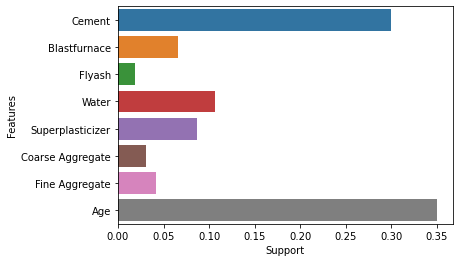

In [142]:
sns.barplot(y=feature_importances['Features'],x=feature_importances['Support'])

## Conclusion:

* Here by we conclude that the best model is Random Forest Regression as it is able to explain 86% variance in data.
* Age, Cement and Water are the features that having more importance in predicting Concrete compressive strength.
* After tuning there's a slight decrease in Root mean square